## 기계 학습

1. 모든 기계 학습 알고리즘은 feature(input, 입력, 설명 변수)와 target(반응 변수) 간의 관계를 나타내는 수학적 모형에 기반한다. 알고리즘에 따라 수학적 모형이 다르며, 회귀 분석은 feature의 선형 함수를 모형으로 사용한다. (실제로는 target의 평균과 feature 간의 관계를 말하며, 이 관계에는 추정해야 할 모수가 내포되어 있다.)

2. 수학적 모형은 feature로부터 target의 평균을 예측할 수 있게 해준다. 평균의 예측치와 실제 target의 관측치 간의 차이가 작게 되도록 모형에 포함된 모수를 추정하는 것을 모형을 훈련(training)시킨다고 하거나 모형이 학습(learning)한다고 한다.

3. 평균의 예측치와 실제 target의 관측치 간의 차이를 작게 되도록 하는 한 가지 방법이 예측값과 관측치의 차이의 제곱합(잔차 제곱합, RSS, SSR residual sum of squares)을 최소로 하는 최소제곱법이다. 잔차 제곱합과 같이 최소화해야 하는 것을 손실함수(loss function) 또는 목적함수(objective function)이라고 한다.
기계학습에서 사용되는 손실함수에는 잔차 제곱합 외에도 negative log likelihood, entropy 등이 있다.  

4. 예측값이 모수가 포함된 모형에서 계산되므로 예측값은 모수의 함수이며, 따라서 손실함수도 모수의 함수이다.

5. 모수의 값이 주어질 때 손실함수를 계산할 수 있어야 하고

6. 모수의 값을 어떻게 변경해야 손실함수를 더 작게 만들 수 있는지 판단하기 위해 손실함수의 미분(모수에 대한 미분)을 계산할 수 있어야 한다.

7. 수학적 모형이 feature의 선형함수인 경우에는 손실함수의 미분이 0이 되는 모수를 구하는 식을 구할 수 있고 이 식을 사용하면 해를 구할 수 있다. (해석적 방법, analytical method) (선형 회귀분석)

8. 수학적 모형이 feature의 비선형함수인 경우에는 손실함수의 미분이 0이 되는 모수를 구하는 식을 구할 수 없기 때문에 반복법(iterative method)사용한다.
임의의 모수 값에서 미분 값을 계산한 다음 이 임의의 모수 값을 조금씩 수정해서 미분 값이 0에 가깝게 되도록 하는 것을 반복하는 것이 반복법이다.
미분 값을 이용해서 모수 값을 어떻게 수정하느냐를 기술한 것이 바로 경사하강법(gradient descent method)이다. (수치적 방법, numerical method) (비선형 회귀분석)

9. 대부분의 기계학습 알고리즘은 비선형 모형에 기반하고 있기 때문에 경사하강법의 개념을 잘 이해해야 한다.

나이(X)와 키(T) 사이의 관계를 보여주는 가상 자료를 생성한다.

In [0]:
# 리스트 5-1-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 데이터 생성 --------------------------------
np.random.seed(seed=1) # 난수를 고정
X_min = 4 # X의 하한(표시 용)
X_max = 30 # X의 상한(표시 용)
X_n = 16 # X의 상한(표시 용)
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2] # 생성 매개 변수
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) \
+ 4 * np.random.randn(X_n) # (A)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T) # (B)

In [79]:
# 리스트 5-1-(2)
print(X)


[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


In [80]:
# 리스트 5-1-(3)
print(np.round(X, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [81]:
# 리스트 5-1-(4)
print(np.round(T, 2))


[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


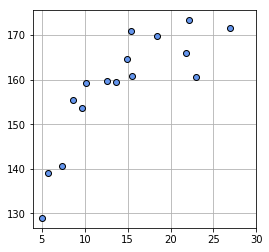

In [82]:
# 리스트 5-1-(5)
# 데이터 그래프 ------------------------------
plt.figure(figsize=(4, 4))
plt.plot(X, T, marker='o', linestyle='None',
         markeredgecolor='black', color='cornflowerblue')

# marker: https://matplotlib.org/3.1.1/api/markers_api.html
# linestyle: https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle
# 실선, 점선, 파선, 쇄선(1점 쇄선, 2점 쇄선 ...)
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()


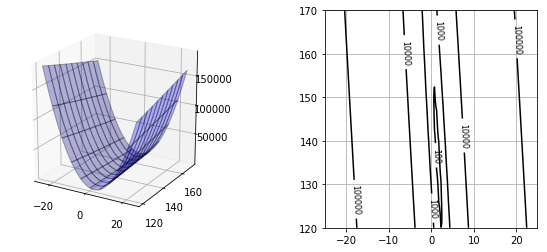

In [83]:
# 리스트 5-1-(6)
from mpl_toolkits.mplot3d import Axes3D
# 평균 오차 함수 ------------------------------
def mse_line(x, t, w):
    y = w[0] * x + w[1]
    mse = np.mean((y - t)**2)
    return mse

# 계산 --------------------------------------
xn = 100 # 등고선 표시 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

# 표시 --------------------------------------
plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3,
                color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, J, 30, colors='black',
                   levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
plt.show()


In [0]:
# 리스트 5-1-(7)
# 평균 제곱 오차의 기울기 ------------------------
def dmse_line(x, t, w):
    y = w[0] * x + w[1]
    d_w0 = 2 * np.mean((y - t) * x)
    d_w1 = 2 * np.mean(y - t)
    return d_w0, d_w1


In [85]:
# 리스트 5-1-(8)
d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1))


[5046.3  301.8]


반복 횟수 13820
W=[1.539947, 136.176160]
dMSE=[-0.005794, 0.099991]
MSE=49.027452


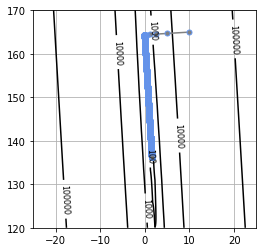

In [86]:
# 리스트 5-1-(9)
# 구배법 ------------------------------------
def fit_line_num(x, t):
    w_init = [10.0, 165.0] # 초기 매개 변수
    alpha = 0.001 # 학습률
    i_max = 100000 # 반복의 최대 수
    eps = 0.1 # 반복을 종료 기울기의 절대 값의 한계
    w_i = np.zeros([i_max, 2])
    w_i[0, :] = w_init
    for i in range(1, i_max):
        dmse = dmse_line(x, t, w_i[i - 1])
        w_i[i, 0] = w_i[i - 1, 0] - alpha * dmse[0]
        w_i[i, 1] = w_i[i - 1, 1] - alpha * dmse[1]
        if max(np.absolute(dmse)) < eps: # 종료판정, np.absolute는 절대치
            break
    w0 = w_i[i, 0]
    w1 = w_i[i, 1]
    w_i = w_i[:i, :]
    return w0, w1, dmse, w_i


# 메인 ------------------------------------
plt.figure(figsize=(4, 4)) # MSE의 등고선 표시
xn = 100 # 등고선 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
cont = plt.contour(xx0, xx1, J, 30, colors='black',
                   levels=(100, 1000, 10000, 100000))
cont.clabel(fmt='%1.0f', fontsize=8) 
plt.grid(True)
# 구배법 호출
W0, W1, dMSE, W_history = fit_line_num(X, T)
# 결과보기
print('반복 횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-',
         color='gray', markersize=10, markeredgecolor='cornflowerblue')
plt.show()


w0=1.540, w1=136.176
SD=7.002 cm


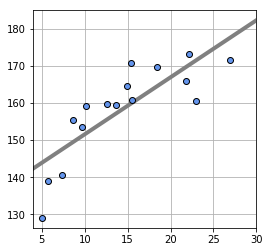

In [87]:
# 리스트 5-1-(10)
# 선 표시 ----------------------------------
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1]
    plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)


# 메인 ------------------------------------
plt.figure(figsize=(4, 4))
W=np.array([W0, W1])
mse = mse_line(X, T, W)
print("w0={0:.3f}, w1={1:.3f}".format(W0, W1))
# mse = mse_line(X, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
show_line(W) 
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black') 
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()


w0=1.558, w1=135.872
SD=7.001 cm


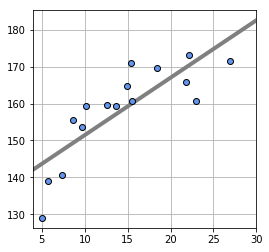

In [88]:
# 리스트 5-1-(11)
# 해석해 ------------------------------------
def fit_line(x, t):
    mx = np.mean(x)
    mt = np.mean(t)
    mtx = np.mean(t * x)
    mxx = np.mean(x * x)
    w0 = (mtx - mt * mx) / (mxx - mx**2)
    w1 = mt - w0 * mx
    return np.array([w0, w1])

# 메인 ------------------------------------
W = fit_line(X, T)
print("w0={0:.3f}, w1={1:.3f}".format(W[0], W[1]))
mse = mse_line(X, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.figure(figsize=(4, 4))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()


## sklearn 을 이용한 선형 회귀분석

기계학습을 위한 파이썬 라이브러리인 sklearn을 이용하여 선형 회귀분석을 할 수 있다.


In [89]:
X.shape

(16,)

In [90]:
X2 = X.reshape(X.shape + (1,))
X2.shape

(16, 1)

In [0]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True)
lm.fit(X2, T)
T_pred = lm.predict(X2)


In [92]:
lm.coef_

array([1.55757515])

In [93]:
lm.intercept_

135.87192425880238

In [94]:
lm.score(X2, T)   # R^2, coefficient of determination

0.6702234125403644

In [95]:
from sklearn.metrics import mean_squared_error
mean_squared_error(T, T_pred)

49.012195342938746

In [96]:
np.sqrt(mean_squared_error(T, T_pred))

7.000871041730361

## 입력 변수를 키와 몸무게 2개인 경우

몸무게의 가상 자료를 생성한다.

In [0]:
# 리스트 5-1-(12)
# 2차원 데이터 생성 --------------------------
X0 = X
X0_min = 5
X0_max = 30
np.random.seed(seed=1) # 난수를 고정
X1 = 23 * (T / 100)**2 + 2 * np.random.randn(X_n)
X1_min = 40
X1_max = 75

In [98]:
# 리스트 5-1-(13)
print(np.round(X0, 2))
print(np.round(X1, 2))
print(np.round(T, 2))


[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


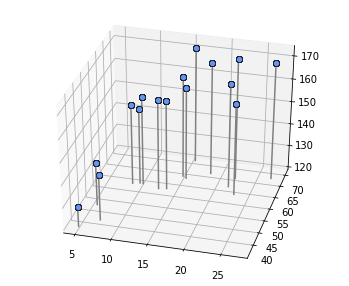

In [99]:
# 리스트 5-1-(14)
# 2차원 데이터의 표시 ------------------------
def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]],
                [120, t[i]], color='gray')
        ax.plot(x0, x1, t, 'o',   # x, y, z의 값을 배열로...
                color='cornflowerblue', markeredgecolor='black',
                markersize=6, markeredgewidth=0.5)
        ax.view_init(elev=35, azim=-75)


# 메인 ------------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1,1,1,projection='3d')
show_data2(ax, X0, X1, T)
plt.show()


SD=12.876 cm


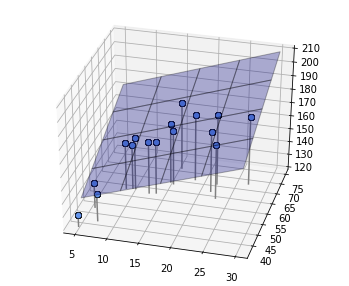

In [100]:
# 리스트 5-1-(15)
#면의 표시 ----------------------------------
def show_plane(ax, w):
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)
    px0, px1 = np.meshgrid(px0, px1)
    y = w[0]*px0 + w[1] * px1 + w[2]
    ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3,
                    color='blue', edgecolor='black') 

#면의 MSE -----------------------------------
def mse_plane(x0, x1, t, w):
    y = w[0] * x0 + w[1] * x1 + w[2] # (A)
    mse = np.mean((y - t)**2)
    return mse

# 메인 ------------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = [1.5, 1, 90]
show_plane(ax, W) 
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()


w0=0.5, w1=1.1, w2=89.0
SD=2.546 cm


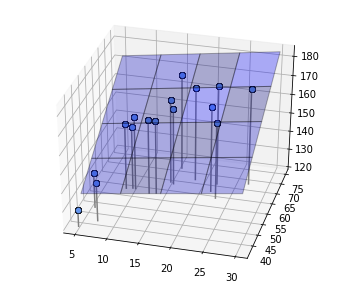

In [101]:
# 리스트 5-1-(16)
# 해석해 ------------------------------------
def fit_plane(x0, x1, t):
    c_tx0 = np.mean(t * x0) - np.mean(t) * np.mean(x0)
    c_tx1 = np.mean(t * x1) - np.mean(t) * np.mean(x1)
    c_x0x1 = np.mean(x0 * x1) - np.mean(x0) * np.mean(x1)
    v_x0 = np.var(x0)
    v_x1 = np.var(x1)
    w0 = (c_tx1 * c_x0x1 - v_x1 * c_tx0) / (c_x0x1**2 - v_x0 * v_x1)
    w1 = (c_tx0 * c_x0x1 - v_x0 * c_tx1) / (c_x0x1**2 - v_x0 * v_x1)
    w2 = -w0 * np.mean(x0) - w1 * np.mean(x1) + np.mean(t)
    return np.array([w0, w1, w2]) 


# 메인 ------------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = fit_plane(X0, X1, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()


## sklarn을 이용한 다중선형회귀모형의 분석

In [102]:
print(X0.shape)
print(X1.shape)
print(T.shape)

(16,)
(16,)
(16,)


sklearn을 사용하려면 설명 변수의 값이 저장된 벡터를 행렬로 바꾸어서 옆으로 붙여야 한다.

In [103]:
X0 = X0.reshape(X0.shape + (1,))
X1 = X1.reshape(X1.shape + (1,))
print(X0.shape, X1.shape)

X = np.hstack((X0, X1))
print(X.shape)

(16, 1) (16, 1)
(16, 2)


In [104]:
print(X)

[[15.42555012 70.4323187 ]
 [23.00811234 58.1547777 ]
 [ 5.00285937 37.21918256]
 [12.55831432 56.51449493]
 [ 8.66889727 57.31720318]
 [ 7.30846487 40.83915269]
 [ 9.65650528 57.79206169]
 [13.63901818 56.93837017]
 [14.91918686 63.03129677]
 [18.47041835 65.69415428]
 [15.47986286 62.32983909]
 [22.13048751 64.94508118]
 [10.11130624 57.72983681]
 [26.95293591 66.8939307 ]
 [ 5.68468983 46.67837662]
 [21.76168775 61.08315123]]


In [105]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True)
lm.fit(X, T)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
lm.coef_

array([0.45606532, 1.0864049 ])

In [107]:
lm.intercept_

89.04744652297443

In [0]:
t_pred = lm.predict(X)

In [109]:
np.sqrt(mean_squared_error(t_pred, T))

2.545575133530988

## 선형 기저함수 모형

선형 기저함수: 계수를 곱해서 더하면 모든 함수를 만들어 낼 수 있는 함수들의 집합을 선형 기저함수라고 한다.

여기서 **계수를 곱하고 더하는 것**을 선형 결합(linear combination)이라고 한다.
예를 들어 다음은 키와 몸무게의 선형결합이다.

$ \beta_1 \cdot 키 + \beta_2 \cdot 몸무게$

일반적으로 기저함수는 비선형 함수이지만 feature만의 함수이므로 기저함수의 선형결합은 모수에 대한 선형 함수이다.
따라서 기저함수 자체에는 추정해야 할 모수가 없으며 선형결합할 때 곱할 계수들만 추정해야 할 모수이다.
따라서 기저함수의 선형결합을 수학적 모형으로 사용할 해석해를 구할 수 있다.

**기저함수를 사용할 때는 기저함수의 개수를 지정해야 한다.**
기저함수의 개수 등과 같이 추정 대상은 아니지만 학습 또는 훈련 전에 결정해야 하는 것을 **초모수**(hyperparameter)라고 한다.
초모수는 기계학습 결과에 큰 영향을 주기 때문에 초모수를 결정하는 것도 기계학습의 중요한 문제이다.

## 가우스 함수(RBF, radial basis function)를 기저함수(basis function)로 하는 수학적 모형에 대한 선형 회귀분석

In [0]:
# --- 리스트 5-2-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 데이터 로드 ----------------------------
outfile = np.load('ch5_data.npz')
X = outfile['X']
X_min = outfile['X_min']
X_max = outfile['X_max']
X_n = outfile['X_n']
T = outfile['T']


기저함수를 계산하는 함수를 작성해야 한다.

In [0]:
# --- 리스트 5-2-(2)
# 가우스 함수 ---------------------------------
def gauss(x, mu, s):
    return np.exp(-(x - mu)**2 / (2 * s**2))


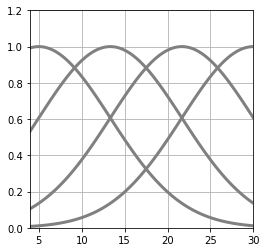

In [112]:
# 리스트 5-2-(3)
# 메인 ------------------------------------
M = 4
plt.figure(figsize=(4, 4))
mu = np.linspace(5, 30, M)
s = mu[1] - mu[0] # (A)
xb = np.linspace(X_min, X_max, 100)
for j in range(M):
    y = gauss(xb, mu[j], s)
    plt.plot(xb, y, color='gray', linewidth=3)
plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.show()


In [0]:
# 리스트 5-2-(4)
# 선형 기저 함수 모델 ----------------
# 여러 기저함수를 선형결합한 수학적 모형의 값을
# 계산할 수 있어야 한다.
def gauss_func(w, x):
    m = len(w) - 1
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x) # x와 같은 크기로 요소가 0의 행렬 y를 작성
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
    y = y + w[m]
    return y


기저함수의 선형결합인 수학적 모형의 손실함수를 계산할 수 있어야 한다.

In [0]:
# 리스트 5-2-(5)
# 선형 기저 함수 모델 MSE ----------------
def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = np.mean((y - t)**2)
    return mse


In [0]:
# 리스트 5-2-(6)
# 선형 기저 함수 모델 정확한 솔루션 -----------------
def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    psi = np.ones((n, m+1))
    for j in range(m):
        psi[:, j] = gauss(x, mu[j], s)
    psi_T = np.transpose(psi)
    
    
    b = np.linalg.inv(psi_T.dot(psi))
    c = b.dot(psi_T)
    w = c.dot(t)
    return w


W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98 cm


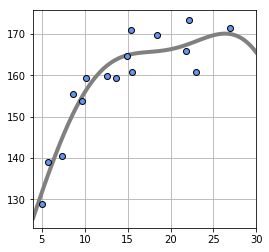

In [116]:
# 리스트 5-2-(7)
# 가우스 기저 함수 표시 -----------------------
def show_gauss_func(w):
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4) 


# 메인 ----------------------------------
plt.figure(figsize=(4, 4))
M = 4
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print('W='+ str(np.round(W,1)))
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()


## 교차 검증(cross-validation)

기저함수의 개수를 결정하는 것도 중요한 문제라고 했다.
기저함수의 개수를 결정하는 교재의 예에서 **과적합(overfitting)**의 개념을 이해해야 한다.

과적합의 문제는 기저함수를 사용한 회귀분석에만 나타나는 문제가 아니다.
대부분의 기계학습 알고리즘에는 기저함수의 개수와 같이 초모수를 지정해야 한다.
초모수를 적절한 값으로 결정할 때 과적합이 일어나지 않게 하는 것이다.

### 과적합을 진단하고 방지하기 위한 기계학습의 전략

1. 자료를 훈련 자료와 테스트 자료로 나눈다. 훈련 자료로 모수를 추정하고 추정된 모형의 성능은 테스트 자료로 평가한다. (이런 방법을 holdout이라고 한다.)
훈련 자료에서는 좋은 성능을 보이지만 테스트 자료에서는 성능이 좋지 않을 때 과적합이 발생했다고 진단한다.

예를 들어 기저함수의 개수가 다른 여러 모형의 성능을 테스트 자료로 평가하고 가장 좋은 성능을 주는 기저함수의 개수를 선택한다.

2. 훈련 자료에서 계산하는 손실함수의 값을 최소화하는 모형이 테스트 자료에서도 좋은 성능을 보일 것이라는 보장이 없으며, 훈련의 목적은 훈련에 사용되지 않은 자료에서도 좋은 성능을 보이게 하는 것 즉 좋은 예측이다.
이것이 자료를 훈련 자료와 테스트 자료로 분할하고 훈련된 모형의 성능은 테스트 자료에서 평가하는 이유이다.

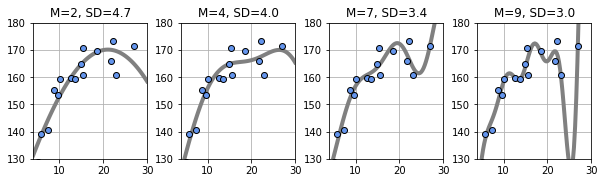

In [117]:
# 리스트 5-2-(8)
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X, T, M[i])
    show_gauss_func(W)
    plt.plot(X, T, marker='o', linestyle='None',
             color='cornflowerblue', markeredgecolor='black')
    plt.xlim(X_min, X_max)
    plt.grid(True)
    plt.ylim(130, 180)
    mse = mse_gauss_func(X, T, W)
    
    
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()


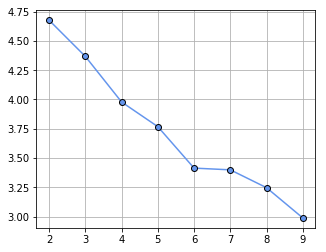

In [118]:
# 리스트 5-2-(9)
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse2 = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X, T, M[i])
    mse2[i] = np.sqrt(mse_gauss_func(X, T, W))
plt.plot(M, mse2, marker='o',
         color='cornflowerblue', markeredgecolor='black')
plt.grid(True)
plt.show()


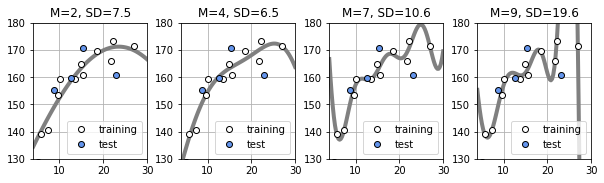

In [119]:
# 리스트 5-2-(10)
# 훈련 데이터와 테스트 데이터 ------------------
X_test = X[:int(X_n / 4 + 1)]
T_test = T[:int(X_n / 4 + 1)]
X_train = X[int(X_n / 4 + 1):]
T_train = T[int(X_n / 4 + 1):]
# 메인 ------------------------------------
plt.figure(figsize=(10, 2.5))


plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X_train, T_train, M[i])
    show_gauss_func(W)
    plt.plot(X_train, T_train, marker='o',
             linestyle='None', color='white',
             markeredgecolor='black', label='training')
    plt.plot(X_test, T_test, marker='o', linestyle='None',
             color='cornflowerblue',
             markeredgecolor='black', label='test')
    plt.legend(loc='lower right', fontsize=10, numpoints=1)
    plt.xlim(X_min, X_max)
    plt.ylim(130, 180)
    plt.grid(True)
    mse = mse_gauss_func(X_test, T_test, W)
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()

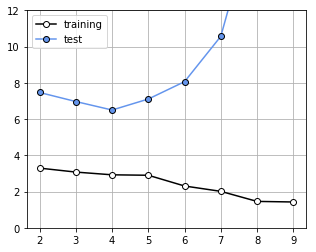

In [120]:
# 리스트 5-2-(11)
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M)) 
for i in range(len(M)):
    W = fit_gauss_func(X_train, T_train, M[i])
    mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, W))
plt.plot(M, mse_train, marker='o', linestyle='-',
         markerfacecolor='white', markeredgecolor='black',
         color='black', label='training')
plt.plot(M, mse_test, marker='o', linestyle='-',
         color='cornflowerblue', markeredgecolor='black',
         label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 12)
plt.grid(True)
plt.show()


In [0]:
# 리스트 5-2-(12)
# K 분할 교차 검증 -----------------------------
def kfold_gauss_func(x, t, m, k):
    n = x.shape[0]
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i] # (A)
        t_train = t[np.fmod(range(n), k) != i] # (A)
        x_test = x[np.fmod(range(n), k) == i] # (A)
        t_test = t[np.fmod(range(n), k) == i] # (A)
        wm = fit_gauss_func(x_train, t_train, m)
        mse_train[i] = mse_gauss_func(x_train, t_train, wm)
        mse_test[i] = mse_gauss_func(x_test, t_test, wm)
    return mse_train, mse_test

In [122]:
# 리스트 5-2-(13)
np.fmod(range(10),5)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

## k-fold cross-validation

자료를 훈련 자료와 테스트 자료로 나눌 때는 기본적으로 랜덤하게 나누면 된다.
이런 단순한 자료의 분할은 어떻게 분할되느냐에 따라 모형의 성능이 다르게 나올 수 있다.
이 문제를 해결하기 위한 전략이 바로 k-fold cross-varlidation이다.

기계학습으로 문제를 풀 때는 하나의 모형에 의존하지 않는다.
일반적으로 여러 후보 모형을 염두에 두고 이 중에서 가장 좋은 성능을 보이는 모형을 최종적으로 선택한다.
특정한 모형의 성능도 초모수에 의존하므로 특정 모형에 다음을 실행하여 최적의 초모수를 결정하여 가장 좋은 성능을 보이도록 한 다음 다른 모형과 비교한다.

1. 훈련 자료를 k개로 분할한다.
2. (k-1)개의 분할로 모형을 훈련시키고 나머지 1개로 훈련된 모형의 성능을 평가한다. 훈련에 사용된 (k-1)개 분할을 훈련 자료, 성능 평가에 사용된 1개 분할을 validation set이라고 한다.
3. validation set을 바꾸어 가면 2를 k번 반복한다.
4. k개의 성능 평가 결과를 평균하여 모형의 성능으로 한다.

이런 절차를 교차 검증(cross-validation)이라고 한다.

교차 검증으로 선택된 최적 초모수를 대입한 각 모형은 훈련 자료와 validation set을 통합한 자료로 다시 훈련시킨다.
이렇게 훈련된 모형의 최종 성능은 테스트 자료로 평가한다.

테스트 자료에서 가장 좋은 성능을 보인 모형을 최종 모형으로 선택한다.

In [0]:
# 리스트 5-2-(14)
M = 4
K = 4
kfold_gauss_func(X, T, M, K)

In [0]:
# 리스트 5-2-(15)
M = range(2, 8)
K = 16
Cv_Gauss_train = np.zeros((K, len(M)))
Cv_Gauss_test = np.zeros((K, len(M)))
for i in range(0, len(M)):
    Cv_Gauss_train[:, i], Cv_Gauss_test[:, i] =\
                    kfold_gauss_func(X, T, M[i], K)
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0))
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis=0))


plt.figure(figsize=(4, 3))
plt.plot(M, mean_Gauss_train, marker='o', linestyle='-',
         color='k', markerfacecolor='w', label='training')
plt.plot(M, mean_Gauss_test, marker='o', linestyle='-',
         color='cornflowerblue', markeredgecolor='black', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 20)
plt.grid(True)
plt.show()

In [0]:
# 리스트 5-2-(16)
M = 3
plt.figure(figsize=(4, 4))
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim([X_min, X_max])
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

In [0]:
# 리스트 5-2-(17)
# 모델 A -----------------------------------
def model_A(x, w):
    y = w[0] - w[1] * np.exp(-w[2] * x)
    return y 


# 모델 A 표시 -------------------------------
def show_model_A(w):
    xb = np.linspace(X_min, X_max, 100)
    y = model_A(xb, w)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4) 


# 모델 A의 MSE ------------------------------
def mse_model_A(w, x, t):
    y = model_A(x, w)
    mse = np.mean((y - t)**2)
    return mse

In [0]:
# 리스트 5-2-(18)
from scipy.optimize import minimize 


# 모델 A의 매개 변수 최적화 -----------------
def fit_model_A(w_init, x, t):
    res1 = minimize(mse_model_A, w_init, args=(x, t), method="powell")
    return res1.x

In [0]:
# 리스트 5-2-(19)
# 메인 ------------------------------------
plt.figure(figsize=(4, 4))
W_init=[100, 0, 0]
W = fit_model_A(W_init, X, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_model_A(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_model_A(W, X, T)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()


In [0]:
# 리스트 5-2-(20)
# 교차 검증 model_A ---------------------------
def kfold_model_A(x, t, k):
    n = len(x)
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i]
        t_train = t[np.fmod(range(n), k) != i]
        x_test = x[np.fmod(range(n), k) == i]
        t_test = t[np.fmod(range(n), k) == i]
        wm = fit_model_A(np.array([169, 113, 0.2]), x_train, t_train)
        mse_train[i] = mse_model_A(wm, x_train, t_train)
        mse_test[i] = mse_model_A(wm, x_test, t_test)
    return mse_train, mse_test


# 메인 ------------------------------------
K = 16
Cv_A_train, Cv_A_test = kfold_model_A(X, T, K)
mean_A_test = np.sqrt(np.mean(Cv_A_test))
print("Gauss(M=3) SD={0:.2f} cm".format(mean_Gauss_test[1]))
print("Model A SD={0:.2f} cm".format(mean_A_test))
SD = np.append(mean_Gauss_test[0:5], mean_A_test)
M = range(6)
label = ["M=2", "M=3", "M=4", "M=5", "M=6", "Model A"]
plt.figure(figsize=(5, 3))
plt.bar(M, SD, tick_label=label, align="center",
facecolor="cornflowerblue")
plt.show()
